# Tutorial 10: A/B Testing and principled peeking

## Learning Objectives

After completing this week's worksheet and tutorial work, you will be able to:

1. Discuss why the methods learned in past courses are not sufficient to answer the more complex research problems being posed in this course (in particular stopping an A/B test early).
2. Explain sequential testing and principled peeking and how it can be used for early stopping of an experiment (e.g., A/B testing).
3. Write a computer script to perform A/B testing optimization with and without using principled peeking.
4. Discuss the tradeoff between stopping earlier and certainty of significance, and thereal world implications (e.g., what does the FDA require for early stopping of clinical trials versus Facebook ads optimization?).
5. List other questions related to A/B testing optimization that may be relevant in a real data application (e.g., what features cause a Facebook ad to perform best?)

In [1]:
# Run this cell before continuing.
library(tidyverse)
library(gsDesign)

source("tests_tutorial_10.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches




## 1. Warm up questions

**Question 1.0**
<br>{points: 1}

Sequential A/B testing is used to analyze only continuous variables. **True or False??**

*Assign your answer to an object called answer1.0. Your answer should be either "true" or "false", surrounded by quotes.*

In [2]:
answer1.0 <- "false"

# your code here
 # No Answer - remove if you provide an answer

In [3]:
test_1.0()

Test passed 🎉
Test passed 🌈
Test passed 🥳
[1] "Success! Good start!!"


**Question 1.1**
<br>{points: 1}

When performing sequential A/B testing, a power analysis is not required since the analyst will check the data before collecting all data. **True or False??**

*Assign your answer to an object called answer1.1. Your answer should be either "true" or "false", surrounded by quotes.*

In [4]:
answer1.1 <- "false"

# your code here
# No Answer - remove if you provide an answer

In [5]:
test_1.1()

Test passed 🥇
Test passed 🥳
Test passed 🌈
[1] "Success!"


**Question 1.2**
<br>{points: 1}

In **full sequential designs**, the analyst performs an analysis after every new observation, sequentially. Would you recommend using a Bonferroni correction for **full sequential designs** of large experiments so that it can be stopped as soon as possible??

*Briefly, justify your recommendation. Think of pros and cons of the correction for the experiment described.*

I would recommend a bonferroni correction, as in full sequential designs, the observed type 1 error would be significantly higher at an unadjusted critical value. This is where a Bonferroni would be helpful, as it would decrease the type one error of initial data points. In the later stages of the data, it may be too conservative (i.e, power is decreased), but I would reccomend a correction of some kind

## 2. Early peeking in A/B testing

In worksheet_10, we studied by means of an A/A testing (i.e., the case where we know that there's no difference in the distributions from the groups) how peeking can inflate the probability of Type I Error. 

In addition, we used different methods to implement principled peeking and early stopping rules in sequential A/B testing.

- **Bonferroni's method** provides an adjustment to classical $p$-values (or equivalently the significance level or critical values) to control the type I error rate. 

- **Pocock's method**, available in `gsDesign` offers a less conservative way of controlling the type I error rate in sequential testing with early stops.

- These 2 methods used uniform boundaries (common critical values) for all interim tests.

In this section, you will examine how the number of interim tests may affect the results and the boundary used. 

**Question 2.0**
<br>{points: 1}

Use the package `gsDesign` to get critical values for the **Pocock's method** for the following experimental design:

- one-sided test to compare two population means (recall that the package will implement $z$-tests which are similar to $t$-tests when sample size is large)

- 20 sequential (interim) tests

- A/A testing design, i.e., effect size = 0 

- a significance level of $5\%$ 

- a power of $80\%$

Use examples in worksheet_10 to write the appropriate code and get the resulting critical values for the experiment described. 

*Assign your final answer to an object called `crit_pocock_20`. Your solution should be a vector with 20 equal values.*

In [6]:
design_pocock_20<- gsDesign(k = 20, #number of interim analysis planned
                          test.type = 1, # for one-sided tests
                          delta = 0, # default effect size
                          alpha = 0.05, #type I error rate
                          beta = 0.2, # type II error rate
                          sfu = 'Pocock')
                          
crit_pocock_20 <- design_pocock_20$upper$bound
crit_pocock_20

[1] 2.392309 2.392309 2.392309 2.392309 2.392309 2.392309 2.392309 2.392309
 [9] 2.392309 2.392309 2.392309 2.392309 2.392309 2.392309 2.392309 2.392309
[17] 2.392309 2.392309 2.392309 2.392309

In [7]:
test_2.0()

Test passed 😸
Test passed 🥳
Test passed 🎊
[1] "Success!"


**Question 2.1**
<br>{points: 1}

Repeat **Question 2.0** but this time get Pocock's critical values for an experimental design that will peek at the data 10 times (i.e., 10 sequential (interim) tests).

*Write the appropriate code and assign your answer to an object called `crit_pocock_10`. Your solution should be a vector with 10 equal values.*

In [8]:
design_pocock_10 <- gsDesign(k = 10, #number of interim analysis planned
                          test.type = 1, # for one-sided tests
                          delta = 0, # default effect size
                          alpha = 0.05, #type I error rate
                          beta = 0.2, # type II error rate
                          sfu = 'Pocock')
                          
crit_pocock_10 <- design_pocock_10$upper$bound
crit_pocock_10



[1] 2.270003 2.270003 2.270003 2.270003 2.270003 2.270003 2.270003 2.270003
 [9] 2.270003 2.270003

In [9]:
test_2.1()

Test passed 🌈
Test passed 🌈
Test passed 😀
[1] "Success!"


**Question 2.2**
<br>{points: 1}

The Pocock's critical values obtained in **Question 2.0** and **Question 2.1** show that as the number of peeks (interim tests) increases, the critical values also increase. 

Briefly, explain why.

As the number of peeks increases, the number of observations per peek decreases. The critical value is higher with less data, as there requires a larger effect shift to ensure that variance isn't the cause of a premature ejection. As more data is processed, the critical value is able to be decreased.

**Question 2.3**
<br>{points: 1}

Suppose that another company decides to use the same test, the same significance level and also to peek 10 times. If the new company wants to increase the probability of finding a significance result when $H_0$ is false (i.e., have more power) and still control the type I error rate, which of the following strategies would you recommend:

**A** Use the same Pocock's critical value as in **Question 2.1** to control the type I error and plan for a larger experiment (i.e., larger sample size)

**B** Don't use the Pocock's method since it's too conservative. Just use raw $p$-values from the CLT sampling distribution.

**C** Use a Bonferroni's correction

**D** There is no way to increase the power of the test

*Hint*: you can use code to design this new experiment

*Assign your answer to an object called answer2.3. Your answer should be one of `"A"`, `"B"`, `"C"`, or `"D"` surrounded by quotes.*

In [10]:
 answer2.3 <- "A"

# your code here
# No Answer - remove if you provide an answer

In [11]:
test_2.3()

Test passed 🌈
Test passed 🌈
Test passed 🎊
[1] "Success!"


## 3. Principled peeking: O’Brien-Fleming method

In this section, we will implement and examine another method, also available in `gsDesign`: the **O’Brien-Fleming method**

Unlike previous methods covered in worksheet_10, the O’Brien-Fleming method uses *non-uniform* boundaries, which has conservative critical values for earlier interim analyses and less conservative values (closer to the unadjusted critical values) as more data are collected. 

As in **Question 3.2.1 of worksheet_10** we will use the function `incremental_t_test` to generate and sequentially analyze data.

In the next few exercises, we will plot the statistics of the sequential tests and add 4 type of boundaries:

- the unadjusted critical values (black line)

- the Bonferroni's adjusted critical values (blue line)

- the Pocock critical values (red line)

- the O'Brien-Fleming critical values (green line)

*Run the following cell to get the function to simulate and analyze data of sequential A/B testing*

In [12]:
# Two-sample t-test with tracking sequential statistic and p-values by incremental sample sizes until getting to n.

# @param n (numeric): Initially planned sample size for each group (for simplicity, n needs to be a multiple of sample_increase_step).
# @param d_0 (numeric): effect size.
# @param mean_current (numeric): Population mean for control variation.
# @param sd_current (numeric): Population standard deviation for current variation.
# @param sd_new (numeric): Population standard deviation for new variation.
# @param sample_increase_step (numeric): Sample size increment.

# @return p.value.df: A tibble that has 3 columns:
# inc_sample_size, statistic, and p_value 

incremental_t_test <- function(n, d_0, mean_current, sd_current, sd_new, sample_increase_step) {
  sample_current <- rnorm(n, mean = mean_current, sd = sd_current)
  sample_new <- rnorm(n, mean = mean_current + d_0, sd = sd_new)

  p.value.df <- tibble(
    inc_sample_size = rep(0, n / sample_increase_step),
    statistic = rep(0, n / sample_increase_step),
    p_value = rep(0, n / sample_increase_step)
  )

  current_sample_size <- sample_increase_step
  
  for (i in 1:nrow(p.value.df))
  {
    t_test_results <- t.test(sample_new[1:current_sample_size], sample_current[1:current_sample_size],
      var.equal = TRUE,
      alternative = "greater"                      
    )
    p.value.df[i, "statistic"] <- as_tibble(t_test_results$statistic)
    p.value.df[i, "p_value"] <- as_tibble(t_test_results$p.value)
    p.value.df[i, "inc_sample_size"] <- current_sample_size
    current_sample_size <- current_sample_size + sample_increase_step
  }

  return(p.value.df)
}

**Question 3.0**
{points: 1}

**A/A testing (cont.)**: as in worksheet_10, let's simulate data that reflects no difference in the population means (i.e., $H_0$ is true).

In this question, analyze the data in batches of 100 experimental units per group until a total of $n = 1000$ per group is collected (i.e., plan for 10 sequential tests).
  
We will assume again that data of both groups is generated from a Normal distribution with a mean equal to \\$200 and a standard deviation equal to \\$50.

Use the `incremental_t_test` function to conduct this experiment.

*Save the result in an object called answer3.0. Your answer should be a tibble with three columns: `inc_sample_size`, `statistic`, and `p_value`.

In [13]:
set.seed(25) # do not change this.

answer3.0 <- 
    incremental_t_test(n = 1000, d_0 = 0, sample_increase_step = 100, mean_current = 200, sd_current = 50, sd_new = 50)

# your code here
 # No Answer - remove if you provide an answer

answer3.0

inc_sample_size,statistic,p_value
<dbl>,<dbl>,<dbl>
100,1.70836464,0.04456791
200,1.41989506,0.07821052
300,1.82818911,0.03400960
400,1.48756139,0.06863081
500,0.66401976,0.25341552
600,0.08894528,0.46457013
700,-0.02177445,0.50868451
800,0.03777807,0.48493468
900,-0.47070584,0.68104604


In [14]:
test_3.0()

Test passed 🥳
Test passed 😸
Test passed 🥳
Test passed 🎊
[1] "Success!"


**Question 3.1**
<br>{points: 1}

Repeat **Question 2.0** but this time get O'Brien-Fleming's critical values for an experimental design that will peek at the data 10 times (i.e., 10 sequential (interim) tests).

*Write the appropriate code and assign your answer to an object called `crit_of_10`. Your solution should be a vector with 10 numeric values.*

In [15]:
# Get critical values of the O'Brien-Fleming design!

# Your code goes here. No skeleton code provided.
design_10 <- gsDesign(k = 10, #number of interim analysis planned
                          test.type = 1, # for one-sided tests
                          delta = 0, # default effect size
                          alpha = 0.05, #type I error rate
                          beta = 0.2, # type II error rate
                          sfu = 'OF')
                          

crit_of_10 <-design_10$upper$bound

In [16]:
test_3.1()

Test passed 🎉
Test passed 😀
Test passed 🥇
[1] "Success!"


**Question 3.2**
<br>{points: 1}

Using the data stored in `answer3.0`, plot the sequence of observed statistics for each interim analysis as a **line** with the incremental sample size on the $x$-axis and the value of the observed statistic on the $y$-axis. 

Add 4 dashed lines that indicate the following 4 boundaries (critical values): 

- a green line for the OF's critical values

- a red line for the Pocock's critical values

- a blue line for the Bonferroni's critical values

- a black line for the unadjusted critical values

The `ggplot()` object's name will be `sequential_stat`.

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

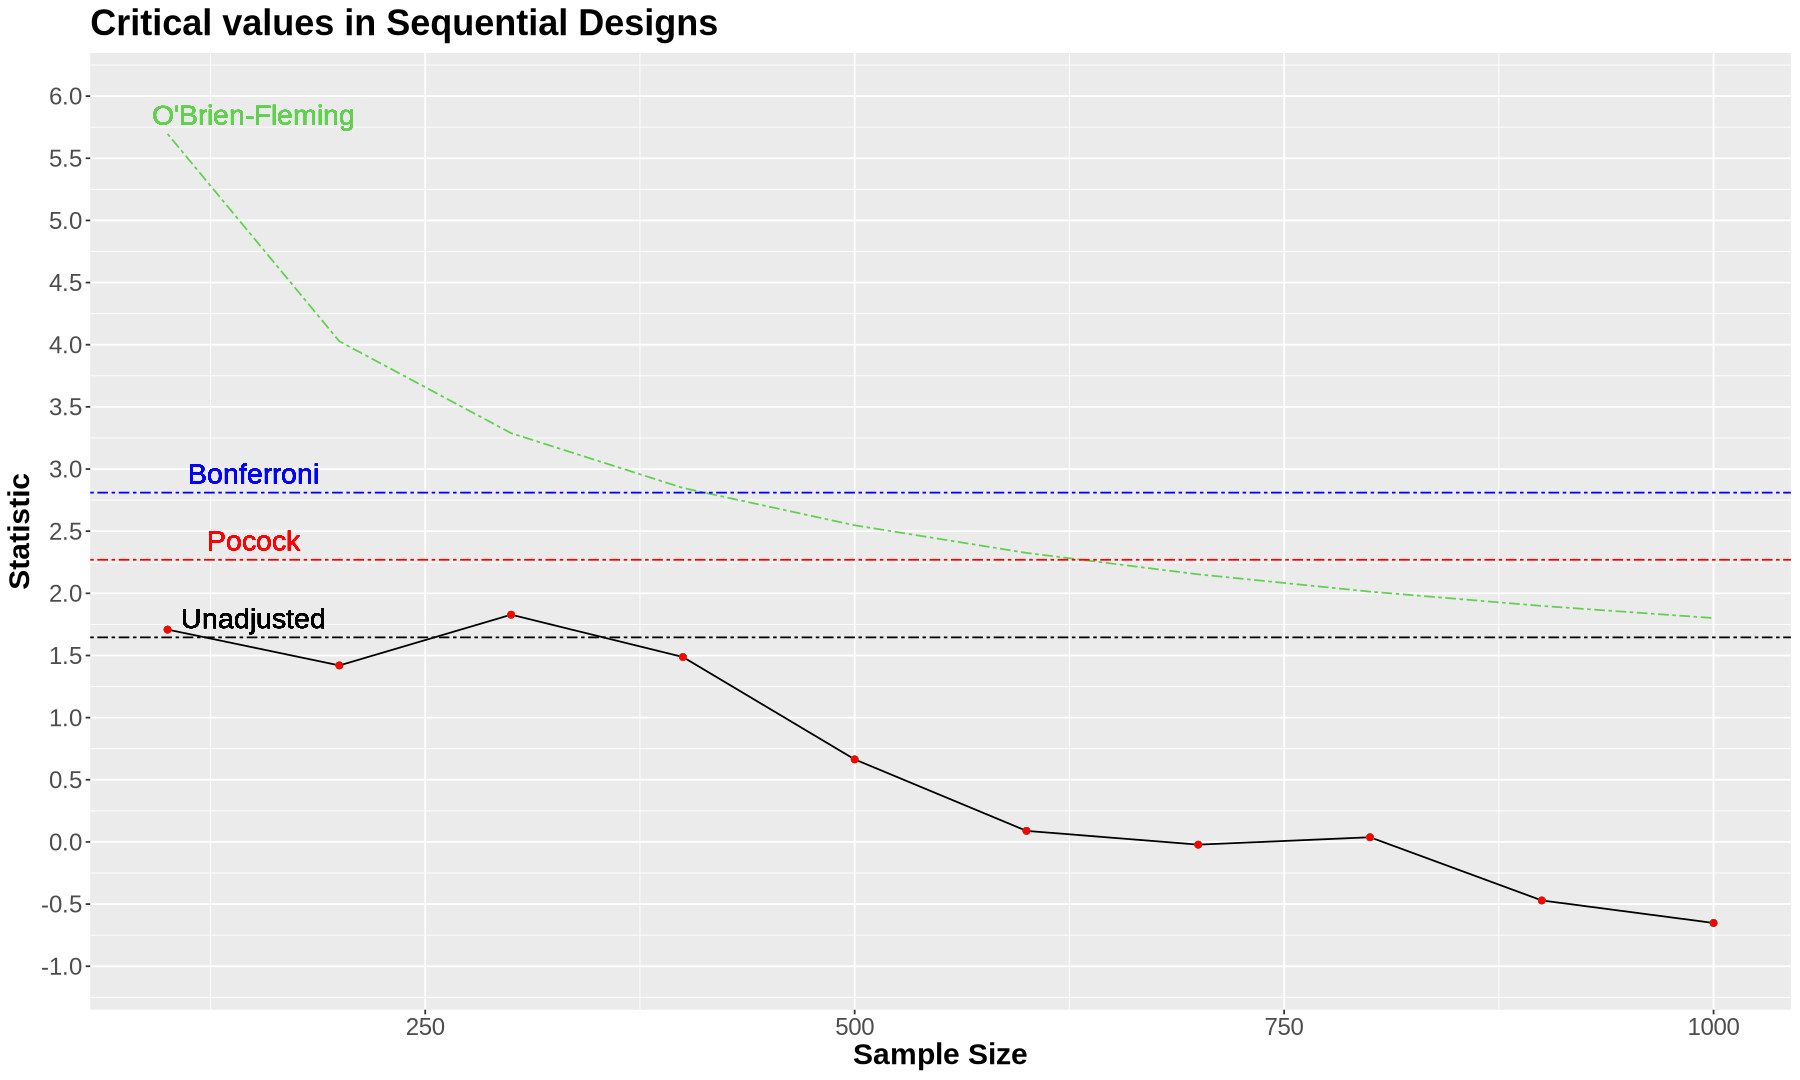

In [22]:
options(repr.plot.width = 15, repr.plot.height = 9) # Adjust these numbers so the plot looks good in your desktop.

crit_unadj <- qt(1 - 0.05, 1998)
crit_bonferroni <- qt(1 - 0.0025, 1998)

sequential_stat <- 
  answer3.0 %>%
  ggplot() +
  geom_line(aes(x = inc_sample_size, y = statistic)) +
  geom_point(aes(x = inc_sample_size, y = statistic)) +
  geom_line(aes(x = inc_sample_size, y = crit_of_10),colour = 3, linetype = "twodash")+
  geom_point(aes(x = inc_sample_size, y = statistic), colour = 3) +
  geom_text(x=150, y=crit_of_10[1] + 0.15, size=6, label="O'Brien-Fleming",colour = 3) +
 geom_hline(yintercept = crit_pocock_10, colour = "red", linetype = "twodash") +
  geom_point(aes(x = inc_sample_size, y = statistic), colour = "red") +
  geom_text(x=150, y=crit_pocock_10 + 0.15, size=6, label="Pocock",colour = "red") +
  geom_hline(yintercept = crit_bonferroni, colour = "blue", linetype = "twodash") +
  #geom_point(aes(x = inc_sample_size, y = rep(crit_bonferroni, 20)), colour = "blue") +
  geom_text(x=150, y=crit_bonferroni + 0.15, size=6, label="Bonferroni",colour = "blue") +
  geom_hline(yintercept = crit_unadj, linetype = "twodash") +
  #geom_point(aes(x = inc_sample_size, y = rep(crit_unadj, 20))) +
  geom_text(x=150, y=crit_unadj + 0.15, size=6, label="Unadjusted") +
  theme(
   text = element_text(size = 18),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) +
  ggtitle("Critical values in Sequential Designs") +
  ylab("Statistic") +
  xlab("Sample Size") +
  coord_cartesian(ylim = c(-1, 6)) +
  scale_y_continuous(breaks = seq(-1, 6, by = 0.5))

# your code here # No Answer - remove if you provide an answer

sequential_stat

In [23]:
test_3.2()

Test passed 🎉
Test passed 🥇
Test passed 🎉
Test passed 🌈
Test passed 🥇
Test passed 😀
Test passed 🎊
Test passed 🎉
[1] "Success!"


**Question 3.3**
<br>{points: 1}

Suppose that the generated data correspond to the political campaign experiment and that the organizers have decided to monitor the data every 100 visitors per website and stop the experiment earlier if there's evidence of a difference between the group means. 

According to the data plotted in **Question 3.2**, is the following statement **True or False*?? 

> The campaign organizers will not erroneously stop the experiment if they compare the observed statistics with any of the boundaries that control the type I error rate

*Assign your answer to an object called `answer3.3`. Your answer should be either `"true"` or `"false"`, surrounded by quotes.*

In [24]:
 answer3.3 <- "true"

# your code here
 # No Answer - remove if you provide an answer

In [25]:
test_3.3()

Test passed 😸
Test passed 😸
Test passed 🎉
[1] "Success! Finish strong!!"


**Question 3.4**

To examine how the O'Brien-Fleming (OF) controls the type I error rate, the campaign organizers decided to: 

- perform the **A/A testing** experiment 100 times 

- count how many times they would wrongly reject $H_0$ with their strategy, and

- compare it with the expected number of rejections given the significance level $\alpha = 0.05$

Use the code below to run 100 experiments and then estimate the type I error rate for the OF method.

Your answer will be a tibble with three columns: `n_rejections_OF`, `n_rejections_unadj`, and `expected_n_rejections`.

These columns should contain: the number of wrong rejections among the 100 experiments for the OF and the classical methods (unadjusted), respectively, compared to the expected number of wrong rejections given the design.

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

In [26]:
set.seed(120)

### Run this before continuing
multiple_times_sequential_tests <- 
    tibble(experiment = 1:100) %>% 
    mutate(seq_test = map(.x = experiment, 
                          .f = function(x) incremental_t_test(n = 1000, d_0 = 0, sample_increase_step = 100, 
                              mean_current = 200, sd_current = 50, sd_new = 50)))

In [27]:
answer3.4 <- multiple_times_sequential_tests %>% 
    mutate(reject_of = map_dbl(.x = seq_test, .f = function(x) sum(x$statistic > crit_of_10) > 0),
           reject_unadj = map_dbl(.x = seq_test, .f = function(x) sum(x$statistic > crit_unadj) >0)) %>%  
    summarise(n_rejections_OF = sum(reject_of),
              n_rejections_unadj = sum(reject_unadj),
              expected_n_rejections = 5)

# your code here
 # No Answer - remove if you provide an answer
                            
answer3.4

n_rejections_OF,n_rejections_unadj,expected_n_rejections
<dbl>,<dbl>,<dbl>
5,20,5


In [28]:
test_3.4()

Test passed 😸
Test passed 🥇
Test passed 🥳
Test passed 🎊
Test passed 🎉
Test passed 🥇
[1] "Success! One more and you are done!"


**Question 3.5**
<br>{points: 1}

Explain briefly the results obtained in **Question 3.4**.


The unadjusted results prematurely rejected the null hypothesis 15 times more than expected due to premature peeking. As OF correction increases the critical value at the beginning as data points are still being processed. The OF critical value decreases at the end, as there is more data that we can draw conclusions based on smaller effect sizes. This allows OF to retain its power while minimizing Type 1 error to expected levels.